# Introduction

In this Kernel I would like to explain few methods for analysing, cleaning and visualizing a dataset. Moreover, as this is one of the best examples of a beginner project in the data science, I would be more than happy to explain the various tributaries of data science as well.

Since the datasets are already available for us, we could skip the process of data mining or data scraping. However, it is important to study the data and to prepare it before analysis. This is a process consisting of two important techniques, namely Data cleansing or cleaning and Data wrangling. These techniques would identify the data quality and set it for further analysing. To name a few contents, these techniques would deal with validating accuracy, reformatting values, threshold checking, understanding the columns and data types; which would finally convert the data into an actionable form. 

In [ ]:
#Import Libraries
#Pandas
import pandas as pd

#Numpy
import numpy as np

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn
import seaborn as sns

#Plotly
import plotly.figure_factory as ff
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Read the first dataset
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
# Let us look at the data
train.head() 

To start with, it is important to know the categorical and numerical variables that estimates the price of the houses.  

In [ ]:
# This includes the list of all columns
train.columns

In [ ]:
#Exploring the categorical variables in the dataset
train.select_dtypes(include = "object").columns

In [ ]:
#Exploring the numerical variables in the dataset
train.select_dtypes(exclude ="object").columns

# Types of Data Analytics

Data analytics could be explained as an extensive usage of data to manipulate the data using a statistical and quantitative approach. This uses explanatory and predictive models and fact-based management to come to a conclusion.  It would be quite a nice idea to explore the different data analytics that data scientists use of a daily basis. These could be defined as the basic and key forms of data analytics. 

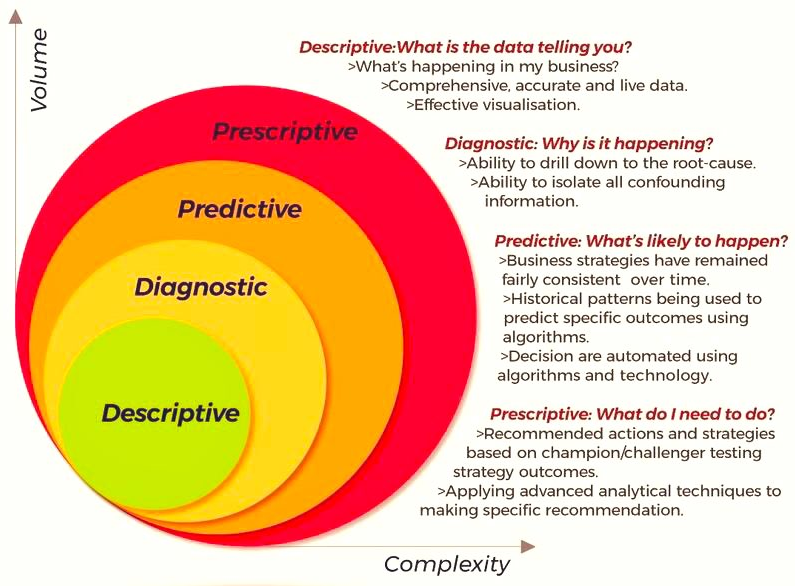

**1. Descriptive analytics: What is happening?**

This is an interpretation of the historical data to understand changes of a data under study. It uses range of data to draw comparisons in a business. Few examples include monthly profit and loss statement, month over month sales growth. The clarity of the information that is been deducted depends on the use of data visualisation. 

**2. Regression or Diagnostic analytics: Why is it happening?**

As the process hints, it empowers an analyst to dig deep and find out the root cause of the problem. In this example of house price estimation, we deal with a regression analytics and compare and study different variables and find out how and why are the house prices high or low. 

**3. Predictive analytics: What is likely to happen?**

This is all about forecasting. To name few contents, this looks for the likelihood of an event happening in the future, estimating a time in which an event might happen. An example of this would include the prediction of a major health condition based on the age of a person. Let’s say the older a person, the more vulnerable the person to a health weakness. 

**4. Prescriptive analytics: What do I need to do?**

This deals with a better course of action from the user side. It uses the complex techniques used in the above analytics in knowing what happened, why has it even occurred, what might happen to determine the best course of action to take. Traffic application could be considered as a best example of this. It chooses the best route for us, considering the distance of each route, speed at which one travel and the current traffic conditions. 

**Reference** : https://www.kdnuggets.com/2017/07/4-types-data-analytics.html

In [ ]:
#Let's look at the info for the non.null count and data type of each column
train.info()

In [ ]:
#By default, describe shows only numerical attributes. 
#top shows the most occured instance in that column
train.describe(include = "object").transpose()

From the above data, there are few variables of some particular interest. It would be, as default, a very important factor to consider the area/zone before building or buying a house. In this case when considering the same, so many choose to stay at Residential Low Density (RL) zone. Now let us look at the price range of the top 5 highly expensive houses.

Now we could look into the MSZoning as a whole by plotting a pie chart. This gives us the percentage comparison of different MSZoning in the price estimation. Meanwhile it is also interesting to compare MSZoning with the SalePrice. This is plotted using a multiple violin plot, containing a box and scatter depiction. For a better data visualisation, I am using plotly. For self-exploring, I am happy to share the link with you https://plotly.com/python/

In [ ]:
# Let us take the unique values from MSZoning
label = train["MSZoning"].unique()
sizes = train["MSZoning"].value_counts().values

# Now we could define the Pie chart
# pull is given as a fraction of the pie radius. This serves the same purpose as explode 
fig_pie1 = go.Figure(data=[go.Pie(labels=label, values=sizes, pull=[0.1, 0, 0, 0])])
# Defining the layout
fig_pie1.update_layout(title="Zone propotion",    
        font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ))
fig_pie1.show()

# Plotting multiple violinplots, including a box and scatter diagram
fig_vio1 = px.violin(x = train['MSZoning'], y = train["SalePrice"], box=True, points="all")
# Defining the layout
fig_vio1.update_layout(
    title="MS Zone-SalePrice",
    xaxis_title="MS Zone",
    yaxis_title="SalePrice",
    font=dict(
        family="Courier New, monospace",
        size=18
    ))
fig_vio1.show()

In [ ]:
# getting the first 5 largest saleprice values
train['SalePrice'].nlargest(5)

On the data description there are certain variables which are too valuable to look at, while considering the price. To me 'neighborhood' speaks first when and stands out as an important parameter while looking for a house. It would be a similar situation here and so let us look at the expensive location, based on the top 5 sale price.

In [ ]:
#identifying the expensive neighborhood after slicing the indexes
HP_Index = [691,1182,1169,898,803]
train['Neighborhood'].iloc[HP_Index]

From this information, it is quite clear that the most expensive houses are in the Northridge location followed by the Northridge Heights. Based on a latest survey by www.bestplaces.net, it is quite clear that in 2020 a Median Home in Ames, Iowa cost around $183,400. At the same time the other expenses like Food & Groceries, Housing, Utilities, Transportation and Miscellaneous expenses are below the normal US Average. 

To know the real estate value of each neighborhood in the best possible way, I would like to create a box plot here with the Neighborhood as "x axis" and SalePrice at "y axis".

In [ ]:
# Plotting split boxplot, including a box and scatter diagram
fig_box1 = px.box(x = train['Neighborhood'], y = train["SalePrice"])

fig_box1.update_layout(
    title="Neighborhood - SalePrice",
    xaxis_title="Neighborhood",
    yaxis_title="SalePrice",
    font=dict(
        family="Courier New, monospace",
        size=18
    ))
fig_box1.show()

So, it is clear from the plot that the highly expensive houses are in Northridge, followed by Northridge heights. On the contrary, the lowest price location in Iowa is at Rail Road (IDOTRR), followed by Old Town (OldTown)

In this kernel a major session deals with the reason of our pursuit, "SalePrice". Before comparing the numerical and categorical relationship with the SalesPrice, let's look at the SalesPrice and look at its behaviour.

In [ ]:
#descriptive statistics summary
train['SalePrice'].describe()

In [ ]:
#Plot histogram
fig_hist1 = train['SalePrice'].iplot(kind='hist', opacity=0.75, color='#007959', title='SalePrice distribution', 
                                yTitle='Count', xTitle='SalePrice', bargap = 0.20)

# Comparing SalePrice and variables

The SalePrice graph seems to deviate from the normal distribution. The highest frequency of SalePrice is in the range between 130k to 150k. From the dataset, it is almost impossible to select the key parameters that control the SalePrice. However, it would be in this case our own wisdom to choose a few variables (choosing both categorical and numerical variables) for the purpose of this study. 

From the set of variables, I have selected the following variables, which can play an important role in estimating the Price up to a greater extend:
1. OverallQual - this is basically the overall quality of the house. I don't know how this value is calculated but looking at the dependencies, it seems worth to take a look. 
2. YearBuilt - the year the house was built
3. TotalBsmtSF - Total area of the basement in square feet
4. GrLivArea - Above ground living area in square feet

After selection, we could just split up the variables on two grounds:
* Categorical variables - OverallQual and YearBuilt. This could be considered as the building variables as it describes the construction of the house. 
* Numerical variables - TotalBsmtSF and GrLivArea. This describes the space of the house. 

# Plotting SalePrice vs Numerical Variables

In [ ]:
#jointplot - TotalBsmtSF vs SalePrice

sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=train, kind='reg', color= 'orange',height = 5, ratio = 2, space=0.01)
sns.set(rc={'figure.figsize':(15,12)})

In [ ]:
#jointplot - GrLivArea vs SalePrice

sns.jointplot(x='GrLivArea',y='SalePrice',data=train, kind='reg', color= 'green',height = 5, ratio = 2, space=0.01)
sns.set(rc={'figure.figsize':(15,12)})

# Plotting SalePrice vs Categorical variable

In [ ]:
# boxplot - YearBuilt - SalePrice
fig_box2 = px.box(x = train['YearBuilt'], y = train["SalePrice"])

fig_box2.update_layout(
    title="YearBuilt - SalePrice",
    xaxis_title="YearBuilt",
    yaxis_title="SalePrice",
    font=dict(
        family="Courier New, monospace",
        size=18)
    )
fig_box2.show()

In [ ]:
# swarmplot - OverallQual - SalePrice
sns.swarmplot(x="OverallQual", y="SalePrice", data=train)

# Inference on a selected variable comparison to SalePrice

The main take away from the one to one comparison comprises of a set of details, namely:

1. 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

2. 'YearBuilt' and 'OverallQual' also seem to be heavily related to 'SalePrice'. This says the better the house quality, higher the price.

# Correlation of variables

As we just looked at the comparison of a selected number of variables to the SalePrice, it is time to look at the correlation of variables to each other. For this comparison, I would be using the following plots
1. Heatmap
2. Clustermap - It uses hierarchal clustering to produce a clustered version of the heatmap
3. Pairplot

In [ ]:
# Heatmap

# Lets consider the correlation matrix
CorrMat = train.corr() 

# using seaborn to create the heatmap
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(CorrMat,linecolor='white',linewidths=1, ax=ax)

In [ ]:
# Clustermap

sns.clustermap(CorrMat,linecolor='white',linewidths=1)

From the above heatmap and cluster map, we could infer variables which are very much correlated and few variables which are not even correlated. 
To name a few, let us consider the following variables.

1. 'GarageCars' and 'GarageArea', these 2 varibales are strongly correlated.
2. 'TotalBsmtSF' and '1stFlrSF', these 2 variables are strongly correlated too.
3. 'OverallCond' and 'YearBuilt' are those variables which are negatively correlated.

Now let us look at the pairplot connecting the dots. 

In [ ]:
# creating pairplot using seaborn
# let us first create a list of columns which are to be studied

clmn1 = ['SalePrice', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',  'OverallQual', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage', 'OverallCond']

sns.pairplot(train[clmn1],palette='rainbow', height = 2.5)
plt.show();

Lets analyse it using a heatmap again. 

In [ ]:
# Heatmap

# Lets consider the correlation matrix
CorrMat2 = train[clmn1].corr() 

# using seaborn to create the heatmap
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(CorrMat2,linecolor='white',linewidths=1, ax=ax, annot = True)

Few topics of this kernel, especially which is mentioned above has been collected from: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook. Please take a look on his findings as well. 

# More Visualization of variables.

**Bathroom size - SalePrice**

In [ ]:
# Comparing SalePrice and FullBath
fig, ax = plt.subplots(figsize=(15,10)) 
sns.boxplot(x="FullBath", y="SalePrice", data=train, palette='deep')

plt.title("Sale Price - Full Bathrooms")

In [ ]:
# Comparing SalePrice and HalfBath
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x="HalfBath", y="SalePrice", data=train, palette='muted')

plt.title("Sale Price - Half Bathrooms")

**Overall Condition - Salesprice**

In [ ]:
# Comparing Overall Condition and HalfBath

fig, ax = plt.subplots(figsize=(15,10)) 
sns.swarmplot(x=train['OverallCond'], y=train["SalePrice"], data=train)

plt.title("Sale Price - OverallCond")

From the graph it is evident that the 2 variables are less related to each other. As in the description OverallCond rates the overall condition of the house. This seems to look strange for the relation with SalePrice

**Electrical - SalePrice**

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.swarmplot(x=train['Electrical'], y=train["SalePrice"], data=train)

plt.title("Sale Price - Electrical")

**GarageCars - SalePrice**

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.violinplot(x="GarageCars", y="SalePrice", data=train, palette='rainbow')

plt.title("Sale Price - GarageCars")

**Heating variable**

Let's look at the type of "Heating" at various houses, to see which is most commonly used heating type in houses.
It is also interesting to look at the heating quality and condition ("HeatingQC"), along with the central Air conditioning ("CentralAir"). 

In [ ]:
#Plot stripplot
fig, ax = plt.subplots(figsize=(12,10)) 
sns.stripplot(x="Heating", y="SalePrice", data=train,jitter=True)

From the visualization, it is quite evident that Gas forced air warm furnace ('GasA') is used at a majority of houses, followed by Gas hot water or steam Heat ('GasW').

In [ ]:
# Violin plot with hue
fig, ax = plt.subplots(figsize=(12,10)) 
sns.violinplot(x="HeatingQC", y="SalePrice", data=train, hue='CentralAir',split=True,palette='Set1')

**KitchenQuality - SalePrice**

In [ ]:
# First of all the data type (object) related to kitchen quality is mapped to an integer value
Kitqua_map = {'Po': 0, 'Fa': 1,'TA': 2, 'Gd': 3,'Ex': 4}
train['KitchenQual'] = train['KitchenQual'].map(Kitqua_map) 

train['KitchenQual']

In [ ]:
# KitchenQuality - SalePrice
fig, ax = plt.subplots(figsize=(15,10)) 
sns.violinplot(x="KitchenQual", y="SalePrice", data=train, palette='deep')

plt.title("Sale Price - KitchenQual")

# Missing Values

On the contrary to all the available values we have within the list, it is important to know about variables that don't have a valid value as well. This is sometimes important while teaching a data set to finally check whether the trained and test datasets are working as expected. But at the same time, it is difficult to train using an invalid or no value. This might be either completely removed or should be filled either with the mean or median or mode value. Another way is to use Decision trees or Random forest models. This way we could handle the missing values in a much better way. 

For a better insight, you could refer the Book "**Decision Trees - A visual Introduction got Beginners**" from Chris Smith. Here is the amazon link: https://www.amazon.com/Decision-Trees-Random-Forests-Introduction-ebook/dp/B078J8GFGC

In [ ]:
# Let us look at the total missing values in the data set
# Lokking for any missing values in the dataframe column
miss_val = train.columns[train.isnull().any()]

# printing out the columns and the total number of missing values of all the column
for column in miss_val:
    print(column, train[column].isnull().sum())

In [ ]:
# defining two empty lists for columns and its values
nan_columns = []
nan_values = []

for column in miss_val:
    nan_columns.append(column)
    nan_values.append(train[column].isnull().sum())

# plotting the graph
fig, ax = plt.subplots(figsize=(30,12))
plt.bar(nan_columns, nan_values, color = 'orange', width = 0.5)
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

Let us set the null values of all numerical variables to mean value of the respective column

In [ ]:
#Exploring the numerical variables in the dataset
num_data = train.select_dtypes(exclude ="object").columns

# now let us fill the missing values with the mean of the respective column
train[num_data].apply(lambda x: x.fillna(x.mean()),axis=0)